### Model Development, and Evaluation

Below generates synthetic data with a curvilinear relationship (where Linear Regression isn't the best fit) and then plots:

✅ Linear Regression Fit
✅ Residual Plot (to check for patterns)
✅ Distribution Plot (to examine residual normality)
✅ KDE Plot (Kernel Density Estimation of residuals)
✅ MSE Plot (Mean Squared Error for various models)
✅ R² Score Plot (Model performance measure)

This will help visualize why Linear Regression isn't the best fit and why a different model (like Polynomial Regression) may work better.

C:\Users\Justin\AppData\Local\Temp\ipykernel_29608\2142327189.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1, 0].legend()


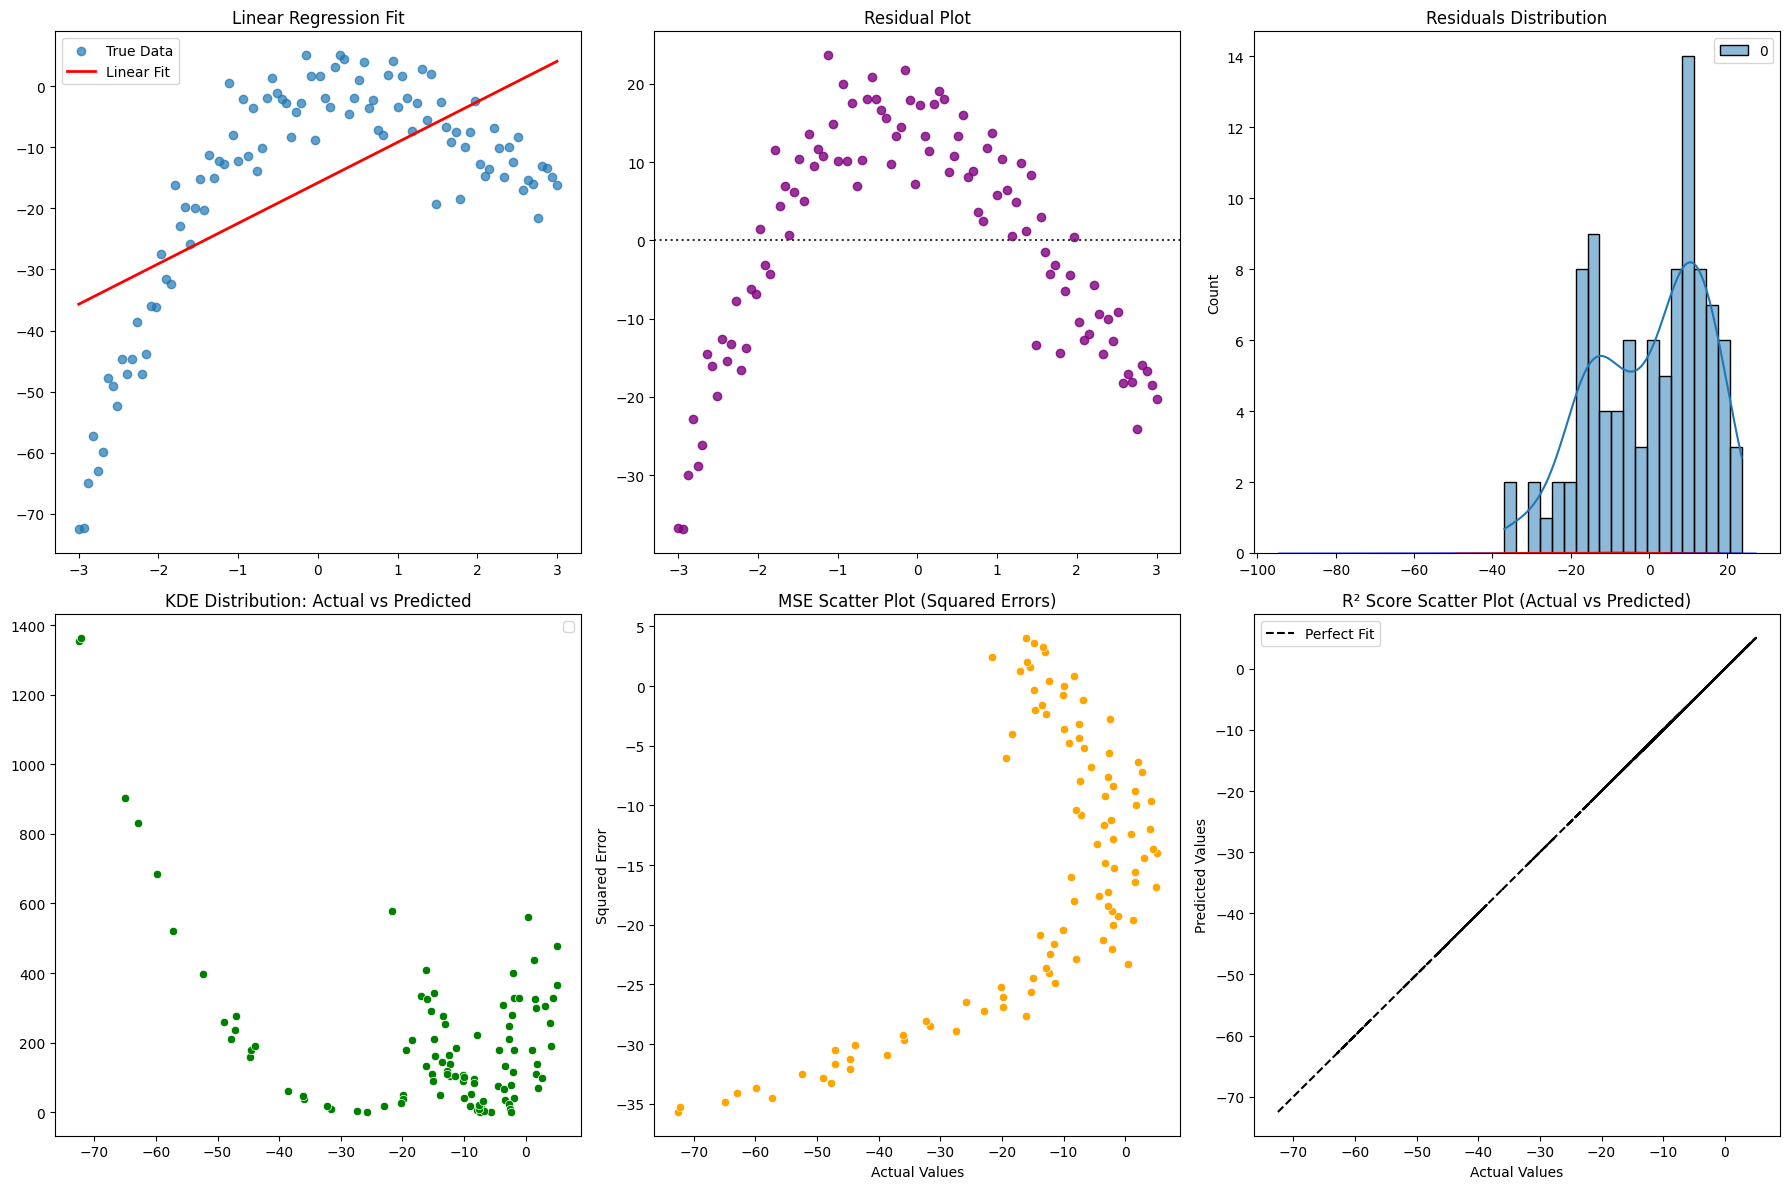

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Generate Non-Linear Data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # Feature
y = X**3 - 5*X**2 + X + np.random.normal(0, 5, X.shape)  # Curved function with noise

# 2️⃣ Fit a Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# 3️⃣ Compute Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
residuals = y - y_pred  # Residuals
mse_values = (y - y_pred) ** 2  # Squared residuals
r2_actual = r2_score(y, y_pred)

# 4️⃣ Plot Everything
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

# (A) Scatter plot with Linear Regression Fit
axes[0, 0].scatter(X, y, label="True Data", alpha=0.7)
axes[0, 0].plot(X, y_pred, color="red", label="Linear Fit", linewidth=2)
axes[0, 0].set_title("Linear Regression Fit")
axes[0, 0].legend()

# (B) Residual Plot
sns.residplot(x=X.flatten(), y=residuals.flatten(), ax=axes[0, 1], color="purple")
axes[0, 1].set_title("Residual Plot")

# (C) Distribution Plot of Residuals
sns.histplot(residuals, kde=True, ax=axes[0, 2], bins=20, color="green")
axes[0, 2].set_title("Residuals Distribution")

# (D) KDE Plot - Compare Actual vs Predicted
sns.kdeplot(y.flatten(), ax=axes[0, 2], label="Actual", fill=True, color="blue")
sns.kdeplot(y_pred.flatten(), ax=axes[0, 2], label="Predicted", fill=True, color="red")
axes[1, 0].set_title("KDE Distribution: Actual vs Predicted")
axes[1, 0].legend()

# (E) MSE Scatter Plot (Squared Errors)
sns.scatterplot(x=y.flatten(), y=mse_values.flatten(), ax=axes[1, 0], color="green")
axes[1, 1].set_title("MSE Scatter Plot (Squared Errors)")
axes[1, 1].set_xlabel("Actual Values")
axes[1, 1].set_ylabel("Squared Error")

# (F) R² Score Scatter Plot (Actual vs Predicted)
sns.scatterplot(x=y.flatten(), y=y_pred.flatten(), ax=axes[1, 1], color="orange")
axes[1, 2].plot(y.flatten(), y.flatten(), color="black", linestyle="dashed", label="Perfect Fit")  # Reference line
axes[1, 2].set_title("R² Score Scatter Plot (Actual vs Predicted)")
axes[1, 2].set_xlabel("Actual Values")
axes[1, 2].set_ylabel("Predicted Values")
axes[1, 2].legend()

plt.tight_layout()
plt.show()
